<a href="https://colab.research.google.com/github/yy51/machine-learning/blob/master/adam_vs_sgd_2_onelayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###TensorFlowのインポート

In [1]:
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 4.3MB 39.0MB/s 
     |████████████████████████████████| 501kB 52.9MB/s 


###データセットのダウンロードと準備

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


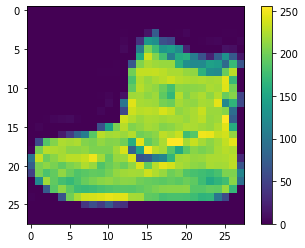

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
import numpy as np
n_labels = len(np.unique(train_labels))
train_labels_onehot = np.eye(n_labels)[train_labels]

In [7]:
n_labels = len(np.unique(test_labels))
test_labels_onehot = np.eye(n_labels)[test_labels]

In [8]:
print(n_labels)
print(test_labels_onehot)
print(test_labels)

10
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 2 1 ... 8 1 5]


### モデル作成

In [9]:
model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(28, 28, 1)))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [10]:
model2 = models.Sequential()
model2.add(layers.Flatten(input_shape=(28, 28, 1)))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [11]:
model3 = models.Sequential()
model3.add(layers.Flatten(input_shape=(28, 28, 1)))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [12]:
model4 = models.Sequential()
model4.add(layers.Flatten(input_shape=(28, 28, 1)))
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

###モデルのコンパイルと学習

In [13]:
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

sgd_scc = model1.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 110us/sample - loss: 0.7441 - accuracy: 0.7618 - val_loss: 0.5619 - val_accuracy: 0.8094
Epoch 2/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5137 - accuracy: 0.8252 - val_loss: 0.5306 - val_accuracy: 0.8157
Epoch 3/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4693 - accuracy: 0.8392 - val_loss: 0.4753 - val_accuracy: 0.8363
Epoch 4/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4448 - accuracy: 0.8473 - val_loss: 0.4663 - val_accuracy: 0.8353
Epoch 5/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4269 - accuracy: 0.8532 - val_loss: 0.4593 - val_accuracy: 0.8394
Epoch 6/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4122 - accuracy: 0.8580 - val_loss: 0.4418 - val_accuracy: 0.8461
Epoch 7/30
60000/60000 [==============================]

In [14]:
model2.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

sgd_mse = model2.fit(train_images, train_labels_onehot, epochs=100, validation_data=(test_images, test_labels_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0822 - accuracy: 0.3425 - val_loss: 0.0714 - val_accuracy: 0.5071
Epoch 2/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0614 - accuracy: 0.6091 - val_loss: 0.0545 - val_accuracy: 0.6374
Epoch 3/100
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0501 - accuracy: 0.6584 - val_loss: 0.0479 - val_accuracy: 0.6654
Epoch 4/100
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0453 - accuracy: 0.6822 - val_loss: 0.0443 - val_accuracy: 0.6879
Epoch 5/100
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0421 - accuracy: 0.7134 - val_loss: 0.0416 - val_accuracy: 0.7173
Epoch 6/100
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0396 - accuracy: 0.7402 - val_loss: 0.0395 - val_accuracy: 0.7364
Epoch 7/100
60000/60000 [=========================

In [15]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

adam_scc = model3.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4994 - accuracy: 0.8259 - val_loss: 0.4194 - val_accuracy: 0.8521
Epoch 2/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3739 - accuracy: 0.8653 - val_loss: 0.4089 - val_accuracy: 0.8526
Epoch 3/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3352 - accuracy: 0.8764 - val_loss: 0.3758 - val_accuracy: 0.8655
Epoch 4/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3123 - accuracy: 0.8846 - val_loss: 0.3727 - val_accuracy: 0.8690
Epoch 5/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2964 - accuracy: 0.8906 - val_loss: 0.3422 - val_accuracy: 0.8775
Epoch 6/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2810 - accuracy: 0.8961 - val_loss: 0.3492 - val_accuracy: 0.8750
Epoch 7/20
60000/60000 [==============================] 

In [16]:
model4.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

adam_mse = model4.fit(train_images, train_labels_onehot, epochs=20, validation_data=(test_images, test_labels_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0262 - accuracy: 0.8208 - val_loss: 0.0248 - val_accuracy: 0.8284
Epoch 2/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0201 - accuracy: 0.8625 - val_loss: 0.0220 - val_accuracy: 0.8484
Epoch 3/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0184 - accuracy: 0.8746 - val_loss: 0.0188 - val_accuracy: 0.8721
Epoch 4/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0171 - accuracy: 0.8838 - val_loss: 0.0184 - val_accuracy: 0.8728
Epoch 5/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0162 - accuracy: 0.8893 - val_loss: 0.0190 - val_accuracy: 0.8704
Epoch 6/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0157 - accuracy: 0.8939 - val_loss: 0.0189 - val_accuracy: 0.8695
Epoch 7/20
60000/60000 [==============================]

###グラフ描画

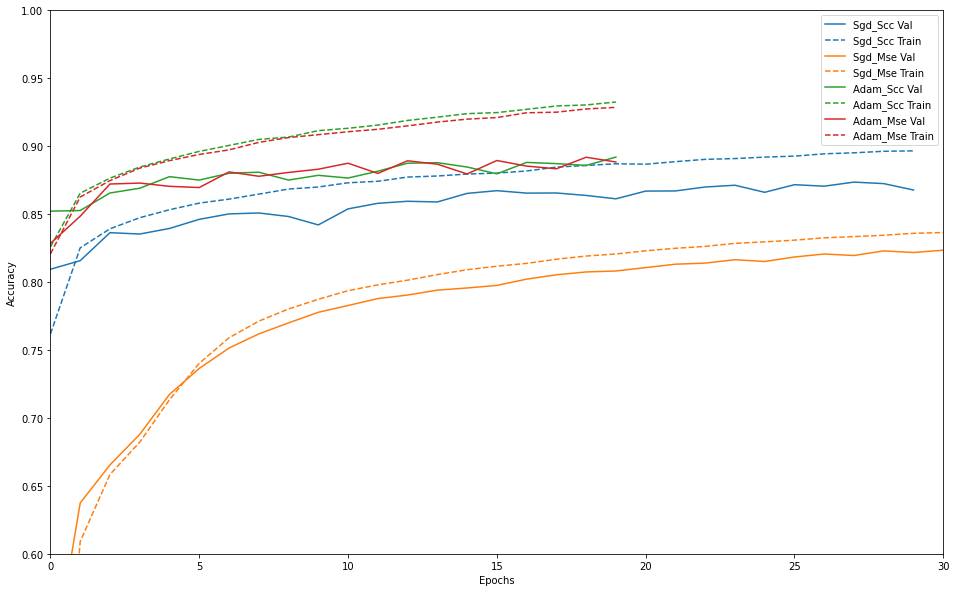

In [22]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                    label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], '--', color=val[0].get_color(), label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

#  plt.hlines([0.99], 0, 4, "blue", linestyles='dashed') 

#  plt.xlim([0,max(history.epoch)])
  plt.xlim([0,30])
  plt.ylim([0.6,1])

plot_history([('sgd_scc', sgd_scc),('sgd_mse', sgd_mse),('adam_scc', adam_scc),('adam_mse', adam_mse)])

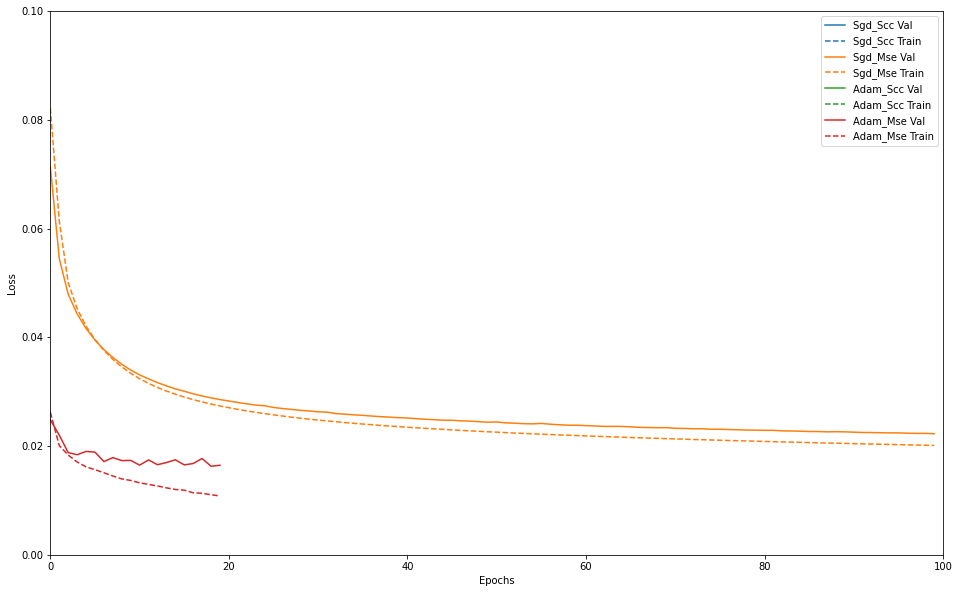

In [18]:
import matplotlib.pyplot as plt

def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], '--', color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

#  plt.hlines([0.99], 0, 4, "blue", linestyles='dashed') 

#  plt.xlim([0,max(history.epoch)])
  plt.xlim([0,100])
  plt.ylim([0,0.1])

plot_history([('sgd_scc', sgd_scc),('sgd_mse', sgd_mse),('adam_scc', adam_scc),('adam_mse', adam_mse)])